In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
# Load data 
df = pd.read_csv("data/sentiment.csv", index_col="Text_ID")
df.head()

,Product_Description,Product_Type,Sentiment
Text_ID,,,
3057,The Web DesignerÛªs Guide to iOS (and Android...,9,2
6254,RT @mention Line for iPad 2 is longer today th...,9,2
8212,Crazy that Apple is opening a temporary store ...,9,2
4422,The lesson from Google One Pass: In this digit...,9,2
5526,RT @mention At the panel: &quot;Your mom has a...,9,2


[0 1 2 3]


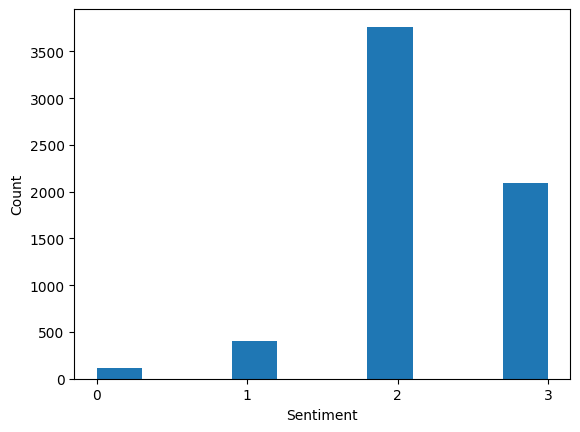

In [8]:
# Check how many examples are available for every sentiment value 
unique_sentiment_values = np.sort(df["Sentiment"].unique())
print(unique_sentiment_values)

_ = plt.figure(dpi=100)
plt.hist(df["Sentiment"])
plt.xticks(range(len(unique_sentiment_values)))
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

[0 1 2 3 4 5 6 7 8 9]


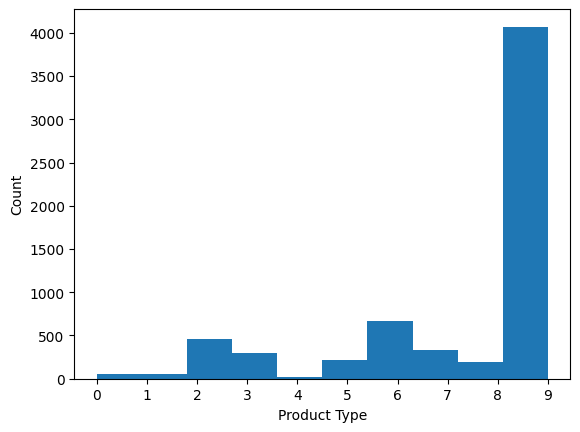

In [9]:
# Check product types distribution
unique_product_types = df["Product_Type"].unique()
unique_product_types = np.sort(unique_product_types)
print(unique_product_types)

_ = plt.figure()
plt.hist(df["Product_Type"])
plt.xticks(range(len(unique_product_types)))
plt.xlabel("Product Type")
plt.ylabel("Count")
plt.show()

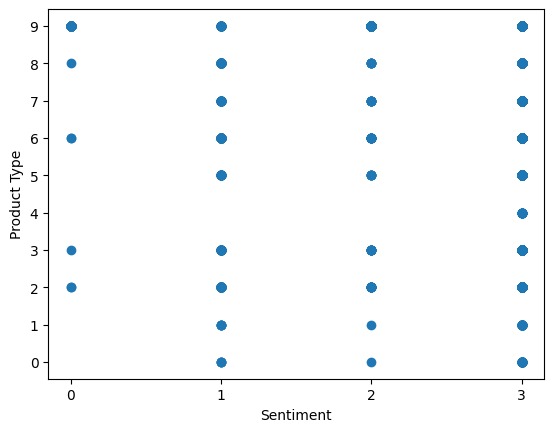

In [11]:
# Check connection between product type and sentiment
_ = plt.figure()
plt.scatter(df["Sentiment"], df["Product_Type"])
plt.xlabel("Sentiment")
plt.ylabel("Product Type")
plt.xticks(range(len(unique_sentiment_values)))
plt.yticks(range(len(unique_product_types)))
plt.show()

In [12]:
# Remove outliers (NOT IMPLEMENTED)

In [ ]:
# Preprocess text to remove stopwords, misspelled words, etc (NOT IMPLEMENTED)

In [13]:
# Process text data (TF-IDF)
vocabulary = []
vocabulary_counts = []

for text in df["Product_Description"]:
    words = text.split(" ")
    for word in words:
        word = word.strip()
        word_exists = word in vocabulary
        if word_exists:
            word_idx = vocabulary.index(word)
            vocabulary_counts[word_idx] += 1
        else:
            vocabulary.append(word)
            vocabulary_counts.append(1)

vocabulary[:3], vocabulary_counts[:3]

(['The', 'Web', 'Designer\x89Ûªs'], [327, 19, 1])

In [16]:
X = []
for text in df["Product_Description"]:
    text_encoding = np.zeros(len(vocabulary))

    words = text.split(" ")
    vocabulary_idx = []

    # Term frequency
    for word in words:
        word = word.strip()
        word_idx = vocabulary.index(word)
        text_encoding[word_idx] += 1
        vocabulary_idx.append(word_idx)
    
    # Normalize by IDF
    for idx in np.unique(vocabulary_idx):
        text_encoding[idx] = text_encoding[idx] / vocabulary_counts[idx]

    X.append(text_encoding)
X = np.array(X)
X[0]


array([0.0030581 , 0.05263158, 1.        , ..., 0.        , 0.        ,
       0.        ])

In [17]:
X.shape

(6364, 15685)

In [21]:
# Extract the labels 
y = df["Sentiment"]

In [22]:
# Split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [23]:
# Build a classifier 
model = RandomForestClassifier()

# Train (fit) a model 
model.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
# Predict the training examples 
y_train_pred = model.predict(X_train)

# Check prediction accuracy
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
print(f"{acc_train=}")

acc_train=0.9994107248084856


In [25]:
# Predict the test examples 
y_test_pred = model.predict(X_test)

# Check prediction accuracy
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)
print(f"{acc_test=}")

acc_test=0.6378633150039277


In [26]:
n_estimators = [5, 10, 50, 100, 150, 500, 1000]
train_accuracy = []
test_accuracy = []

for ne in n_estimators:
    model = RandomForestClassifier(n_estimators=ne)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

    train_accuracy.append(acc_train)
    test_accuracy.append(acc_test)

KeyboardInterrupt: 

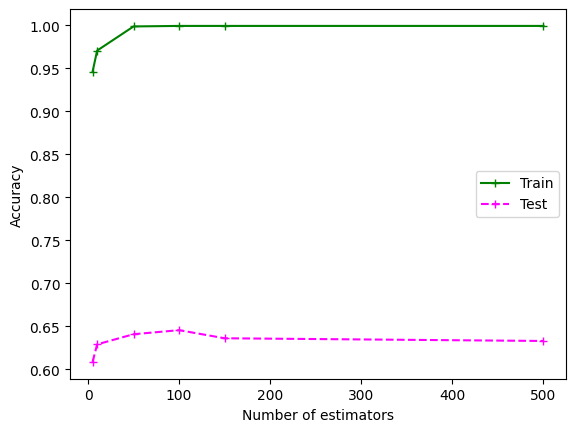

In [29]:
_ = plt.figure()
plt.plot(n_estimators[:-1], train_accuracy, label="Train", c="green", marker="+")
plt.plot(n_estimators[:-1], test_accuracy, label="Test", c="magenta", marker="+", linestyle="dashed")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
depth = [5, 10, 15]
train_accuracy = []
test_accuracy = []

for max_depth in depth:
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

    train_accuracy.append(acc_train)
    test_accuracy.append(acc_test)

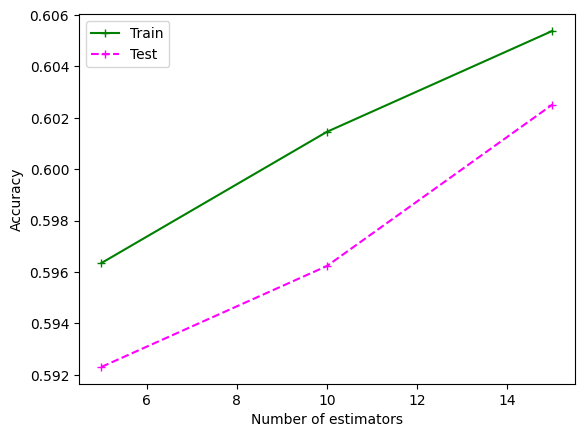

In [33]:
_ = plt.figure()
plt.plot(depth, train_accuracy, label="Train", c="green", marker="+")
plt.plot(depth, test_accuracy, label="Test", c="magenta", marker="+", linestyle="dashed")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()